In [6]:
import pandas as tian
# tian.set_option("display.max_rows", None)
tian.set_option('display.max_columns', None)
import seaborn as sns
import builtins
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
def df_deets(df_or_names):
    def print_info(df, df_name):
        print(f"{df_name}:")
        if hasattr(builtins, "display"):
            display(df)
        else:
            print(df)
        print("\n")
        
        summary_df = tian.DataFrame({
            "Data types": df.dtypes,
            "Duplicates": [df.duplicated(subset=[col]).sum() for col in df.columns],
            "NAs": df.isna().sum().values,
            "Distinct values": df.nunique().values
        }).set_index(df.columns)
        
        print(f"{df_name} summary:")
        if hasattr(builtins, "display"):
            display(summary_df)
        else:
            print(summary_df)
        print("\n")
        print(df.columns)
        print("\n")
        total_duplicates = df.duplicated().sum()
        print(f"Total number of duplicate rows in {df_name}: {total_duplicates}\n")

    if isinstance(df_or_names, list): 
        for item in df_or_names:
            if isinstance(item, str):
                df = globals()[item] 
                print_info(df, item)
            else:
                print_info(item, "dataframe")
    else: 
        if isinstance(df_or_names, str):
            df = globals()[df_or_names]  
            print_info(df, df_or_names)
        else:
            print_info(df_or_names, "dataframe")

This week, we explore discrete and continuous probability distributions, key concepts in probability theory and statistics. Discrete distributions describe variables that take on distinct, countable outcomes (e.g., a dice roll), while continuous distributions model variables that can assume any value within a range (e.g., heights of individuals). Reflect on the differences between these types of distributions and their real-world applications. Share your insights, examples, and any questions you might have about these fundamental ideas.

Answer:
Probability distributions of all types are a core component for data science, especially with the continued emergence of probabilistic large language models. Discrete distribututions are for a finite number of items with a finite number of values, like the number of days in a month or cars sold a week. Continuous distributions are for an infinite number of items with an infinite number of values, like the height of a person or the time it takes for a bus to arrive. Between any two points on a continous spectrum, there are an infinite number of values. These distributions can be used to model a customers liklihood to buy a product based on the number of times they see an ad. A discrete distribution is the choice because a customer sees an ad a finite numbers of times and that can be correlated with behavior. 


## Gamma vs. Exponential Distributions - comparing two related distributions

This chart illustrates the relationship between the Exponential and Gamma distributions by showing how the Exponential Distribution (black dashes) is a special case of the Gamma distribution (blue and purple lines) when k = 1. The Gamma distribution models the sum of k independent lammbda random variables. As k increases, the Gamma distributions shifts to the right and starts to look more symmetric. When k = 2, the distribution starts to take on rightward skewed distribution. By k = 5, it starts to look like a pressed down normal distribution. This relationship will hold so long as each summon exponential variable shares the same lambda.

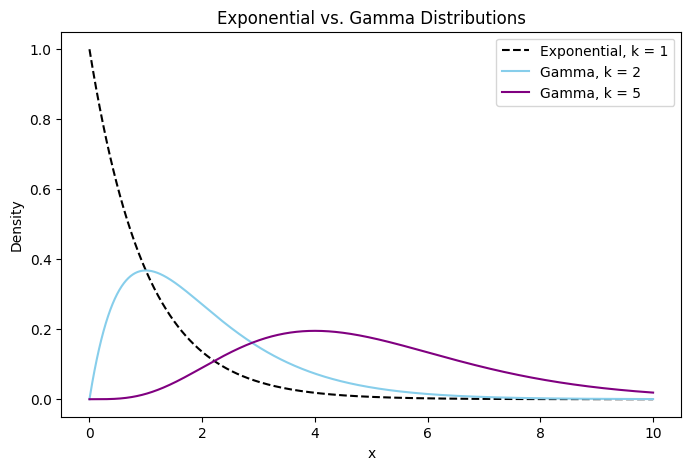

In [5]:

x = np.linspace(0, 10, 1000)
exp = stats.expon.pdf(x, scale=1)

gp2 = stats.gamma.pdf(x, a=2, scale=1)
gp5 = stats.gamma.pdf(x, a=5, scale=1)

plt.figure(figsize=(8, 5))
plt.plot(x, exp, label="Exponential, k = 1", linestyle="--", color="black")
plt.plot(x, gp2, label="Gamma, k = 2 ", color="skyblue")
plt.plot(x, gp5, label="Gamma, k = 5", color="purple")

plt.xlabel("x")
plt.ylabel("Density")
plt.title("Exponential vs. Gamma Distributions")
plt.legend()
plt.show()


For the exercise component, I chose exercise 2 from section 5.2 of the probability textbook. The exercise states:
"Choose a number U from the interval[0,1] with uniform distribution. Find the cumulative distribution and density for the random variables

(a) Y = U + 2
(b) Y = U^3

<lambdifygenerated-15>:2: RuntimeWarning: invalid value encountered in power
  return select([less(y, 0),less_equal(y, 1),True], [0,y**0.333333333333333,1], default=nan)
<lambdifygenerated-16>:2: RuntimeWarning: invalid value encountered in power
  return select([less(y, 0),less_equal(y, 1),True], [0,0.333333333333333*y**(-0.666666666666667),0], default=nan)


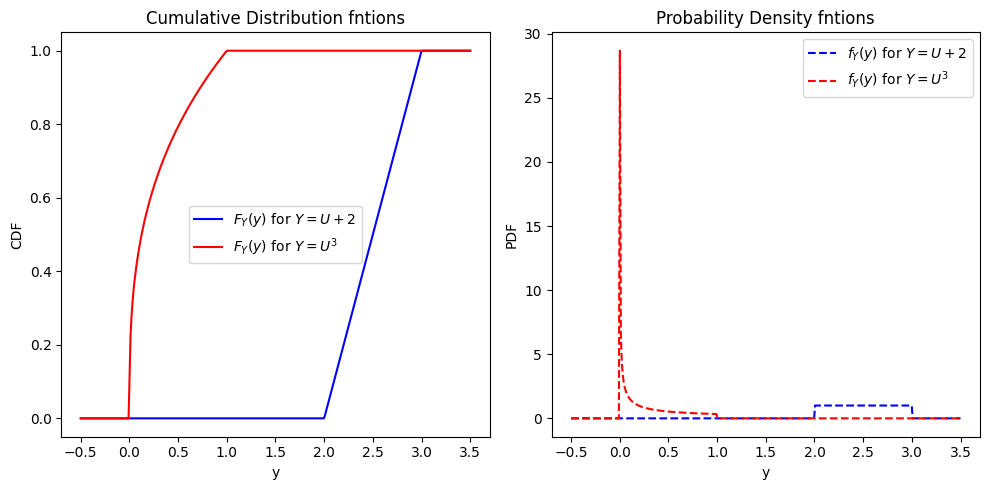

In [10]:
y = sp.Symbol('y')

FY1 = sp.Piecewise((0, y < 2), (y - 2, (y >= 2) & (y <= 3)), (1, y > 3))
fY1 = sp.diff(FY1, y)

FY2 = sp.Piecewise((0, y < 0), (y**(1/3), (y >= 0) & (y <= 1)), (1, y > 1))
fY2 = sp.diff(FY2, y)

FY1_fn = sp.lambdify(y, FY1, 'numpy')
fY1_fn = sp.lambdify(y, fY1, 'numpy')
FY2_fn = sp.lambdify(y, FY2, 'numpy')
fY2_fn = sp.lambdify(y, fY2, 'numpy')

yv = np.linspace(-0.5, 3.5, 400)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(yv, FY1_fn(yv), label=r'$F_Y(y)$ for $Y=U+2$', color='blue')
plt.plot(yv, FY2_fn(yv), label=r'$F_Y(y)$ for $Y=U^3$', color='red')
plt.title("Cumulative Distribution fntions")
plt.xlabel("y")
plt.ylabel("CDF")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(yv, fY1_fn(yv), label=r'$f_Y(y)$ for $Y=U+2$', color='blue', linestyle='--')
plt.plot(yv, fY2_fn(yv), label=r'$f_Y(y)$ for $Y=U^3$', color='red', linestyle='--')
plt.title("Probability Density fntions")
plt.xlabel("y")
plt.ylabel("PDF")
plt.legend()

plt.tight_layout()
plt.show()
